In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


https://stackoverflow.com/questions/22967086/colouring-edges-by-weight-in-networkx

https://stackoverflow.com/questions/25128018/change-edge-thickness-based-on-weight

https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import igraph as ig
#import cairocffi
#import pycairo
import hypernetx as hnx
import hypernetx.algorithms.generative_models as gm
import hypernetx.algorithms.hypergraph_modularity as hmod
import hnxwidget as hnxw

import math
import warnings
from collections import defaultdict
import pandas as pd
from hypernetx import Hypergraph
from networkx.algorithms.community import k_clique_communities


 d1 = pd.read_csv('./utils/50_0.0_linear/50_0.0_linear_he.txt', delimiter="  ", header = None).to_dict()[0]

lin0 = {key: list(map(int, value.split())) for key, value in d1.items()}

for i in range(0, len(list(lin0.keys()))):
    newkeys = (['l' + str(x) for x in range(len(lin0))])
    lin0[newkeys[i]]=lin0.pop(list(lin0.keys())[0])
    
lin0p = grapher(0 ,0 ,0 ,lin0)
lin0p_1, lin0p_2 = drawer(lin0p)

plt.rcParams['figure.figsize'] = [20, 20]

print("Hyperedges for 0.0 linear:")
lin0p_1

A = str25p_2.get_edgelist()
#G = nx.DiGraph(A) # In case your graph is directed
G = nx.Graph(A)

plt.rcParams['figure.figsize'] = [12.5, 12.5]

nx.draw_networkx(G, pos=None, arrows=None, with_labels=True)
G

In [3]:
H1 = hnx.Hypergraph({'a':[1,2,3,4],'b':[4,5,6],'c':[4,5,7],'d':[1,2,8,9,10]})
H1.nodes, H1.edges

(EntitySet(:Nodes,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],{'weight': 1.0}),
 EntitySet(:Edges,['d', 'a', 'c', 'b'],{'weight': 1.0}))

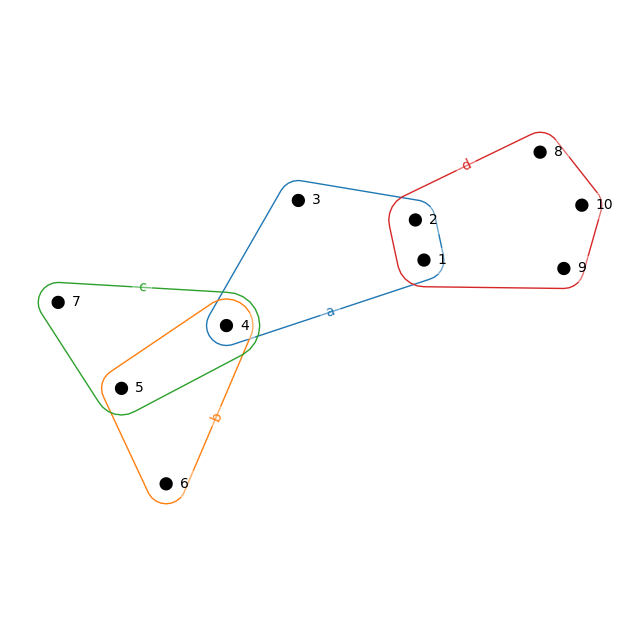

In [4]:
hnx.drawing.rubber_band.draw(H1)

In [7]:
H1 = hnx.Hypergraph({'P1':['n1', 'n2', 'n3'],'P2':['n1', 'n2'],'P3':['n2', 'n3'],'P4':['n3', 'n4']})
H1.nodes, H1.edges

(EntitySet(:Nodes,['n2', 'n3', 'n1', 'n4'],{'weight': 1.0}),
 EntitySet(:Edges,['P1', 'P4', 'P2', 'P3'],{'weight': 1.0}))

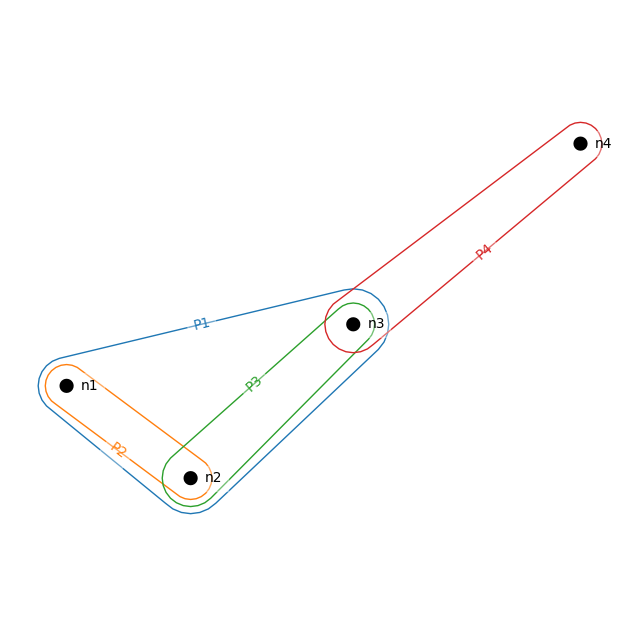

In [8]:
hnx.drawing.rubber_band.draw(H1)

Hyperedges:


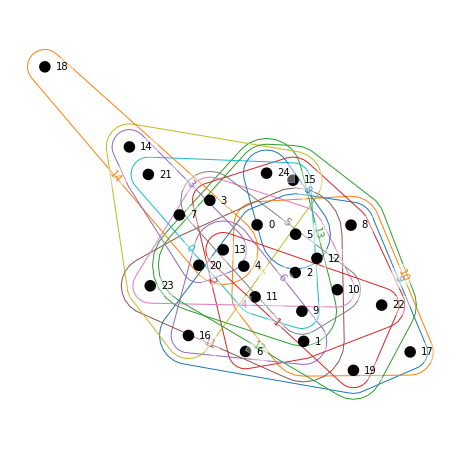

In [34]:
def grapher(n, m, p, x):
    if ((n == 0 or m == 0) and p == 0):
        H = hnx.Hypergraph(x)
    else:
        H = gm.erdos_renyi_hypergraph(n, m, p)
    return H

def drawer(H):
    rubberband = hnx.drawing.rubber_band.draw(H)
    #try:    
    #    bipartit = hnx.drawing.two_column.draw(H)
    #except:
    #    print("No Bipartit for this one")
    #else:
    #    print("Nothing went wrong")
    normal = hmod.two_section(H)
    
    
    return rubberband, normal
    

H = grapher(25, 15, .2, _)

hrb, hn = drawer(H)
print("Hyperedges:")
hrb

'Normal' representation:


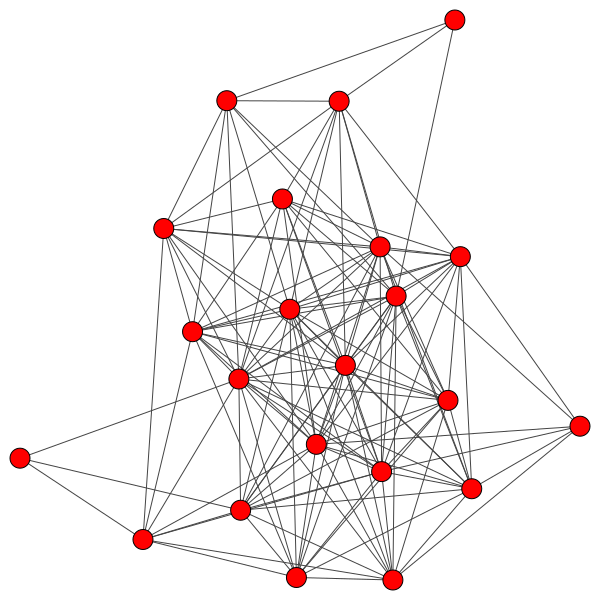

In [8]:
print("'Normal' representation:")
ig.plot(hn)

AttributeError: 'numpy.int64' object has no attribute 'uid'

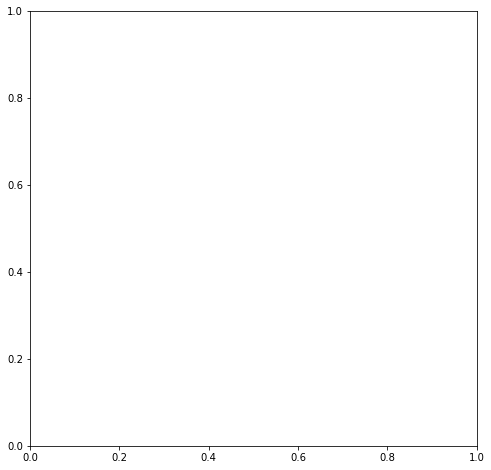

In [9]:
hnx.drawing.two_column.draw(H)

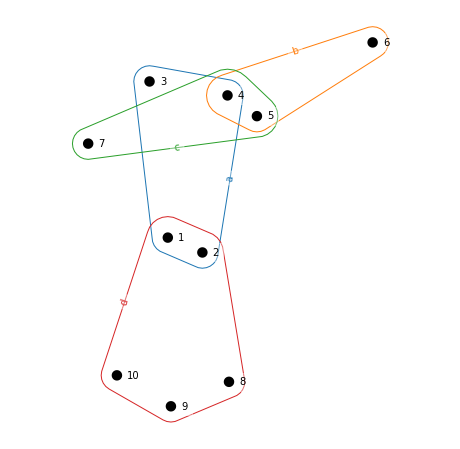

In [10]:
H_hand = grapher(0 ,0 ,0 ,{'a':[1,2,3,4],'b':[4,5,6],'c':[4,5,7],'d':[1,2,8,9,10]})

hrb_hand, hn_hand = drawer(H_hand)
hrb_hand

'Normal' representation:


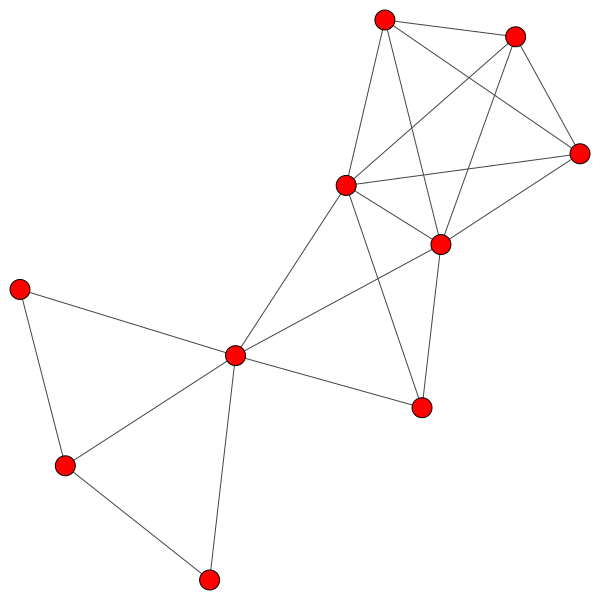

In [11]:
print("'Normal' representation:")
ig.plot(hn_hand)

In [12]:
hn_hand

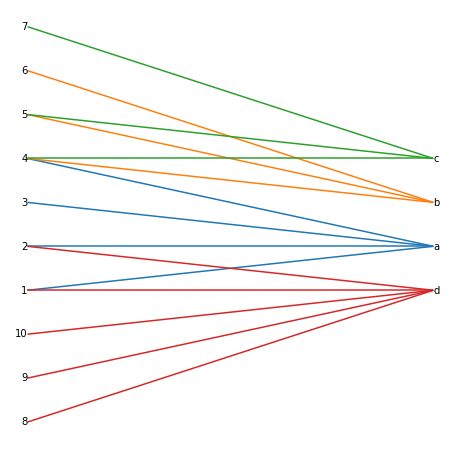

In [13]:
hnx.drawing.two_column.draw(H_hand)

In [14]:
type(H_hand) == type(H)

True

In [15]:
H

Hypergraph({2: [0, 3, 4, 6, 7, 11, 13, 16, 17, 19, 24], 9: [0, 6, 11, 15], 12: [0, 2, 7], 3: [1, 2, 15, 19], 4: [1, 8, 21], 8: [1, 3, 7, 12, 14, 18, 21], 14: [1, 14, 17, 18], 6: [2, 3, 8, 17, 21], 11: [2, 3, 4, 11, 12, 13, 18, 19], 5: [3, 15, 16, 23], 13: [3, 4, 11, 16, 21], 10: [6, 11, 22], 0: [8, 13, 14, 20], 1: [17], 7: [18, 19, 21, 22, 24]},name=)

In [16]:
type({7: [0, 1, 5, 6, 10, 17, 23], 11: [1, 9, 16, 20, 24], 12: [1, 2, 4, 19, 23], 1: [2, 6, 12, 19, 24], 2: [2, 3, 8, 13], 3: [2, 5, 7, 10, 14, 20], 0: [3, 6, 10, 19], 6: [3, 9, 15], 13: [3, 5, 6, 9, 11, 12], 9: [4, 5, 8, 10, 22], 10: [4, 5, 11, 12, 23], 4: [8, 14, 16, 19, 23, 24], 14: [9, 13, 15, 18, 20], 8: [10, 18], 5: [16, 20]})

dict

In [13]:
H2 = grapher(0, 0, 0, {7: [0, 1, 5, 6, 10, 17, 23], 11: [1, 9, 16, 20, 24], 12: [1, 2, 4, 19, 23], 1: [2, 6, 12, 19, 24], 2: [2, 3, 8, 13], 3: [2, 5, 7, 10, 14, 20], 0: [3, 6, 10, 19], 6: [3, 9, 15], 13: [3, 5, 6, 9, 11, 12], 9: [4, 5, 8, 10, 22], 10: [4, 5, 11, 12, 23], 4: [8, 14, 16, 19, 23, 24], 14: [9, 13, 15, 18, 20], 8: [10, 18], 5: [16, 20]})

HyperNetXError: Error: Self reference in submitted elements. Entity 2 may not contain itself.

In [37]:
n = 20
k1 = {i : random.randint(1, 20) for i in range(n)}
k2 = {i : sorted(k1.values())[i] for i in range(n)}
g1 = {i : random.choice([0, 1]) for i in range(n)}
g2 = {i : random.choice([0, 1]) for i in range(n)}
omega = np.array([[20, 1], [1, 20]])
H_dcsbm = gm.dcsbm_hypergraph(k1, k2, g1, g2, omega)

H_dcsbm

2023-01-26 10:19:24,149 [714] WARNING  py.warnings:109: [JupyterRequire] /v/bkwdds/.local/lib/python3.8/site-packages/hypernetx/algorithms/generative_models.py:192: UserWarning: The sum of the degree sequence does not match the entries in the omega matrix
  warnings.warn(



Hypergraph({16: [17, 13, 9, 1], 13: [17, 13], 14: [17, 15], 12: [17, 13, 1, 14], 8: [17, 9], 15: [13, 9, 15], 11: [13, 9], 3: [13], 19: [18, 6, 10, 19, 0, 2, 12], 18: [18, 6, 10, 19, 2], 17: [18, 6, 10, 8], 10: [18, 6, 10, 19, 8, 0], 7: [6, 10], 5: [6, 11]},name=)

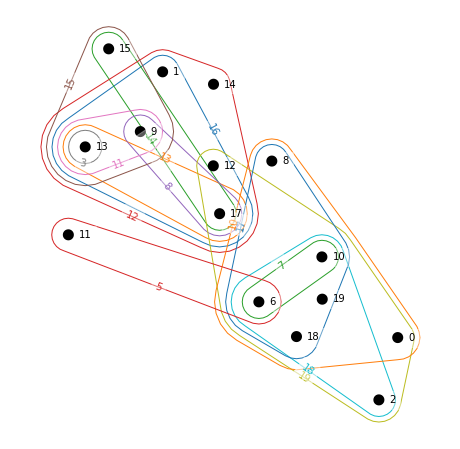

In [38]:
hnx.drawing.rubber_band.draw(H_dcsbm)

In [19]:
H_dcsbm.nodes, H_dcsbm.edges

(StaticEntity(None,[0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 17, 18, 19],{}),
 StaticEntitySet(None,[0, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],{}))

AttributeError: 'numpy.int64' object has no attribute 'uid'

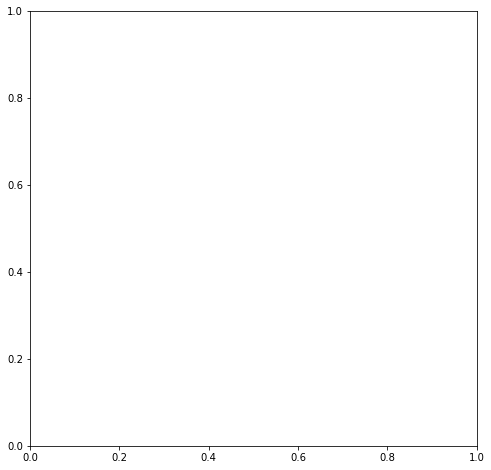

In [20]:
hnx.drawing.two_column.draw(H_dcsbm)


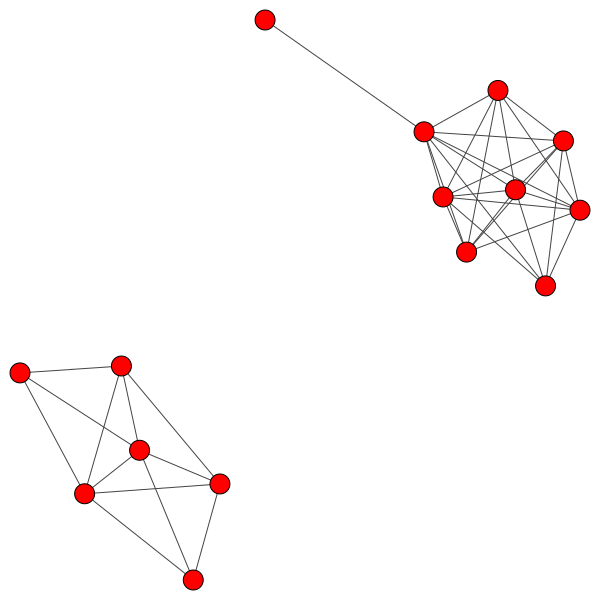

In [39]:
H_dcsbm_normal = hmod.two_section(H_dcsbm)
ig.plot(H_dcsbm_normal)

In [40]:
H_dcsbm_normal

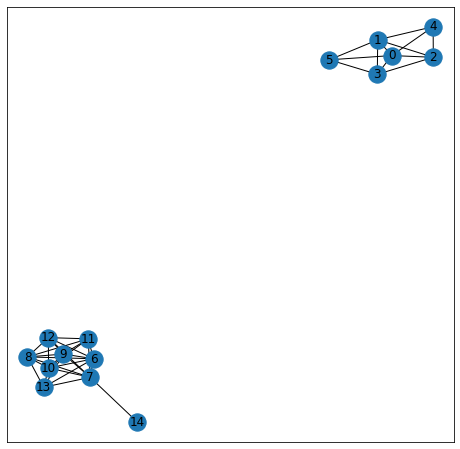

In [41]:
A = H_dcsbm_normal.get_edgelist()
G = nx.DiGraph(A) # In case your graph is directed
G = nx.Graph(A)

nx.draw_networkx(G, pos=None, arrows=None, with_labels=True)

In [42]:
G

In [60]:
communities = list(k_clique_communities(G, 5, cliques=None))
sorted(list(communities[0]))

[6, 7, 8, 9, 10, 11, 12, 13]

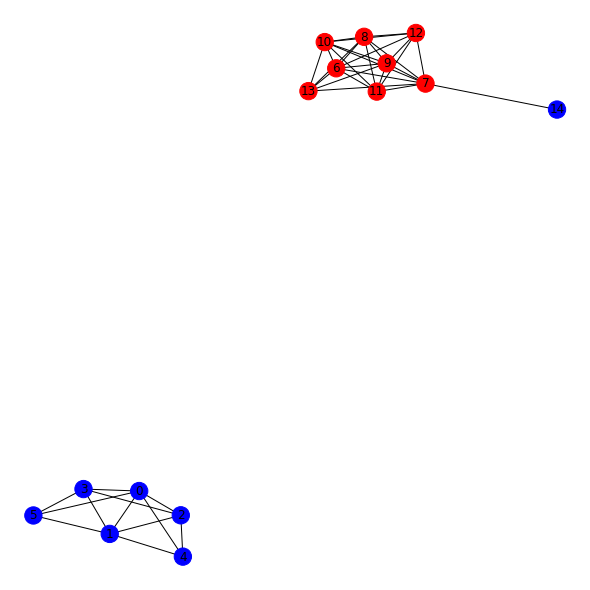

In [61]:
color_map = []
for node in G:
    if node in list(eval('sorted(list(communities[0]))')):
        color_map.append('red')
    else: 
        color_map.append('blue')      
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
7,8
31,59
2,30
1,17,40,63
23,74
9,18
51,68
1,64
3,11
3,10,20,45,75
12,61
2,13
2,4
6,32
1,52
8,58
1,6,18
1,69
1,36
2,43
3,15,46
1,26
50,66
2,16
1,9,28
8,9
11,54
4,17
1,37,55
3,14
4,60,62
7,27
1,7,53
49,56
2,70
1,6,33
10,39,65
2,3,18
1,72
5,71
3,5
19,73
3,35
1,14
7,12,34
13,25,44
1,4,21,22
1,5,6,57
10,16,41,42
1,5
29,47,48
1,15,24


In [5]:
proba = pd.read_csv('./utils/result_he.txt')

ParserError: Error tokenizing data. C error: Expected 4 fields in line 7, saw 5


In [28]:
df = pd.read_csv('./utils/result_he.txt', sep = " ",  names=["Data"])
df.insert(0, 'Letter', ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
                         't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
                         'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
df

,Letter,Data
0,a,"5,8,38,53"
1,b,"1,6"
2,c,"5,46"
3,d,"17,32"
4,e,"26,45"
5,f,"7,14"
6,g,"1,2,4,9,11"
7,h,"13,22,30"
8,i,"1,3,5,51"
9,j,"7,48"


In [ ]:
x = df.set_index('Letter')['Data'].to_dict()
x

{'a': '5,8,38,53',
 'b': '1,6',
 'c': '5,46',
 'd': '17,32',
 'e': '26,45',
 'f': '7,14',
 'g': '1,2,4,9,11',
 'h': '13,22,30',
 'i': '1,3,5,51',
 'j': '7,48',
 'k': '1,7,28',
 'l': '12,61',
 'm': '6,55',
 'n': '10,63',
 'o': '2,4',
 'p': '2,57,66',
 'q': '2,5,25',
 'r': '14,18',
 's': '1,6,10',
 't': '2,3,56',
 'u': '1,43',
 'v': '1,36',
 'w': '16,39,73',
 'x': '2,69',
 'y': '4,19',
 'z': '1,4,40',
 'A': '1,68,71',
 'B': '1,7,9',
 'C': '1,16',
 'D': '17,20',
 'E': '2,42,65,67',
 'F': '1,31',
 'G': '27,54,58',
 'H': '8,44',
 'I': '4,47',
 'J': '18,29',
 'K': '3,15',
 'L': '1,3,75',
 'M': '1,8',
 'N': '3,37,74',
 'O': '15,62',
 'P': '3,5',
 'Q': '1,10,21,23',
 'R': '13,35',
 'S': '49,64',
 'T': '9,24,41,50',
 'U': '34,72',
 'V': '1,33',
 'W': '6,70',
 'X': '3,11,12',
 'Y': '1,60',
 'Z': '52,59'}

In [35]:
H_proba = grapher(0 ,0 ,0 ,x)


Hyperedges:


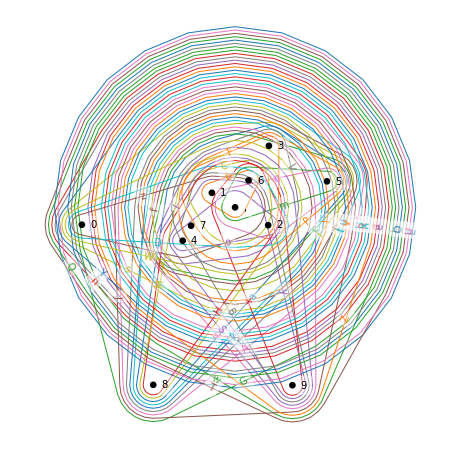

In [36]:
H_proba_1, H_proba_2 = drawer(H_proba)
print("Hyperedges:")
H_proba_1

In [38]:
df2 = pd.read_csv('./utils/result_he.txt', sep = " ",  names=["Data"])
df2.insert(0, 'Letter', ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
                         't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
                         'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'ab'])

In [39]:
x2 = df2.set_index('Letter')['Data'].to_dict()
x2

{'a': '7,8',
 'b': '31,59',
 'c': '2,30',
 'd': '1,17,40,63',
 'e': '23,74',
 'f': '9,18',
 'g': '51,68',
 'h': '1,64',
 'i': '3,11',
 'j': '3,10,20,45,75',
 'k': '12,61',
 'l': '2,13',
 'm': '2,4',
 'n': '6,32',
 'o': '1,52',
 'p': '8,58',
 'q': '1,6,18',
 'r': '1,69',
 's': '1,36',
 't': '2,43',
 'u': '3,15,46',
 'v': '1,26',
 'w': '50,66',
 'x': '2,16',
 'y': '1,9,28',
 'z': '8,9',
 'A': '11,54',
 'B': '4,17',
 'C': '1,37,55',
 'D': '3,14',
 'E': '4,60,62',
 'F': '7,27',
 'G': '1,7,53',
 'H': '49,56',
 'I': '2,70',
 'J': '1,6,33',
 'K': '10,39,65',
 'L': '2,3,18',
 'M': '1,72',
 'N': '5,71',
 'O': '3,5',
 'P': '19,73',
 'Q': '3,35',
 'R': '1,14',
 'S': '7,12,34',
 'T': '13,25,44',
 'U': '1,4,21,22',
 'V': '1,5,6,57',
 'W': '10,16,41,42',
 'X': '1,5',
 'Y': '29,47,48',
 'Z': '1,15,24',
 'ab': '4,5,38,67'}

In [40]:
H_proba2 = grapher(0 ,0 ,0 ,x2)


Hyperedges:


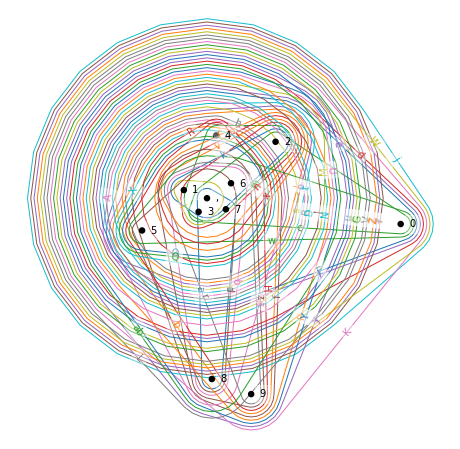

In [41]:
H_proba2_1, H_proba2_2 = drawer(H_proba2)
print("Hyperedges:")
H_proba2_1

In [43]:
df3 = pd.read_csv('./utils/result_he.txt', sep = " ",  names=["Data"])
df3.insert(0, 'Letter', ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
                         't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
                         'T', 'U', 'V', 'W', 'X', 'Y'])

In [44]:
x3 = df3.set_index('Letter')['Data'].to_dict()
x3

{'a': '16,38,72',
 'b': '1,3,14,69',
 'c': '2,5',
 'd': '1,6',
 'e': '9,29,44,53',
 'f': '5,57',
 'g': '21,37',
 'h': '12,49',
 'i': '1,23,30',
 'j': '7,48,70',
 'k': '4,7',
 'l': '5,47',
 'm': '2,4',
 'n': '13,59',
 'o': '1,75',
 'p': '5,8,33',
 'q': '16,42',
 'r': '1,39',
 's': '1,10,28,45,58',
 't': '17,19,73',
 'u': '8,25',
 'v': '1,34',
 'w': '1,50',
 'x': '1,10',
 'y': '1,18',
 'z': '1,62,67',
 'A': '2,66',
 'B': '3,11,35,61',
 'C': '6,14,24,65',
 'D': '2,31',
 'E': '2,9',
 'F': '9,60',
 'G': '7,27',
 'H': '4,7,11',
 'I': '1,20,54',
 'J': '5,43',
 'K': '36,68',
 'L': '3,15',
 'M': '3,56,63',
 'N': '1,6,40',
 'O': '46,51,55,71',
 'P': '4,13,22',
 'Q': '1,3,41',
 'R': '10,17',
 'S': '12,52',
 'T': '2,8',
 'U': '3,6,18',
 'V': '1,3',
 'W': '1,15',
 'X': '2,4,26,74',
 'Y': '1,32,64'}

In [45]:
H_proba3 = grapher(0 ,0 ,0 ,x3)

Hyperedges:


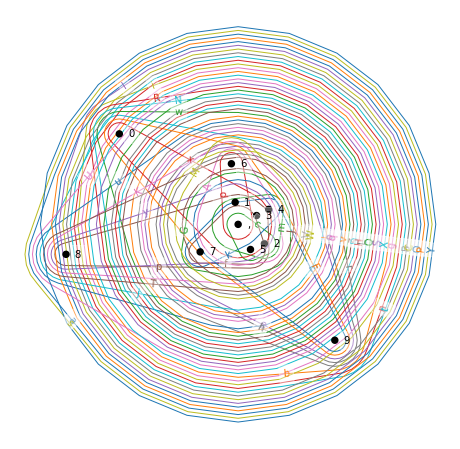

In [46]:
H_proba3_1, H_proba3_2 = drawer(H_proba3)
print("Hyperedges:")
H_proba3_1